## NO Regularisation

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
print(f"Initial shape of dimensions of x_train: {x_train.shape}")

print(f"Number of samples in train data: {len(x_train)}")
print(f"Number of labels in train data: {len(y_train)}")

print(f"Number of samples in test data: {len(x_test)}")
print(f"Number of labels in test data: {len(y_test)}")

print("\n")
print(f"Dimensions of x_train: {x_train[0].shape}")
print(f"Labels in x_train: {y_train.shape}")
print("\n")
print(f"Dimensions of x_test: {x_test[0].shape}")
print(f"Labels in x_test: {y_test.shape}")

Initial shape of dimensions of x_train: (60000, 28, 28)
Number of samples in train data: 60000
Number of labels in train data: 60000
Number of samples in test data: 10000
Number of labels in test data: 10000


Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)


Dimensions of x_test: (28, 28)
Labels in x_test: (10000,)


<Figure size 640x480 with 0 Axes>

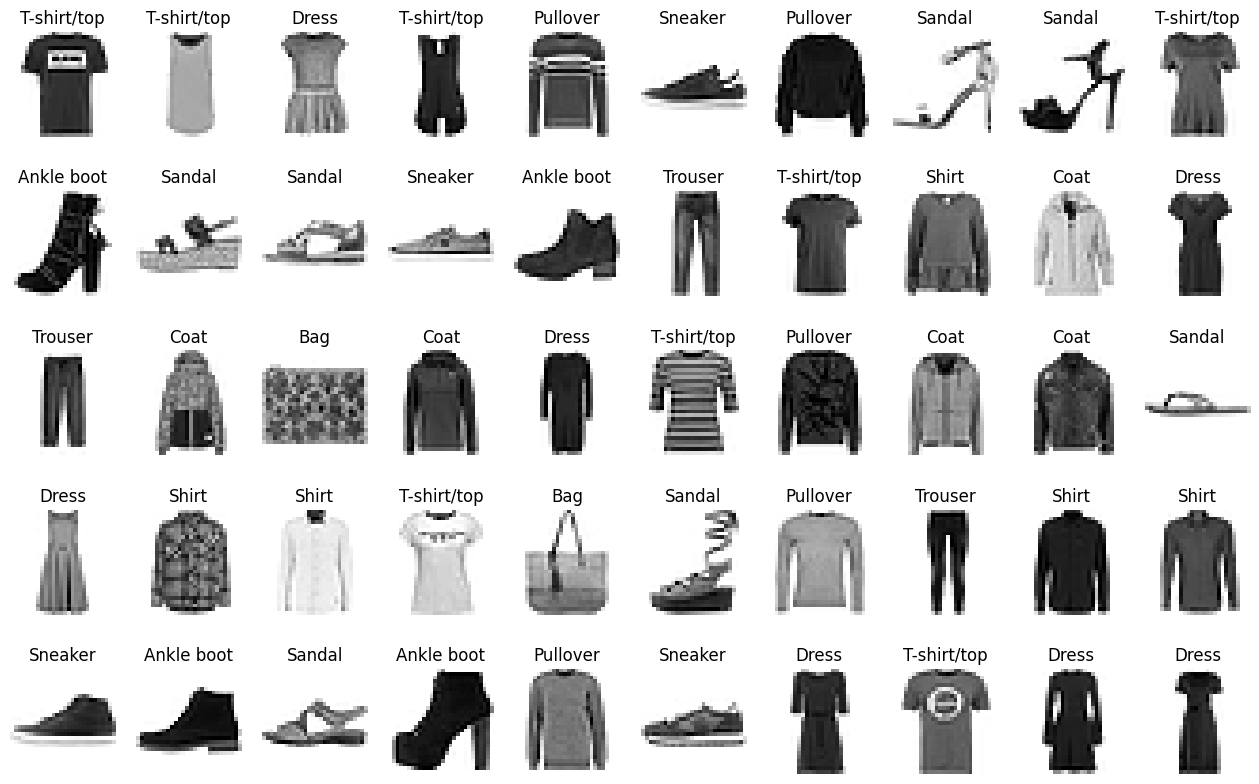

In [3]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50

for index in range(1, num_of_images+1):
  class_names = classes[y_train[index]]
  plt.subplot(5, 10, index).set_title(f"{class_names}")
  plt.axis("off")
  plt.imshow(x_train[index], cmap="gray_r")

In [4]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

input_shape = (img_rows, img_cols, 1)

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Number of Classes: {y_test.shape[1]}")

num_classes = y_test.shape[1]

Number of Classes: 10


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                 activation="relu",
                 input_shape=input_shape))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

In [7]:
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(0.001, momentum=0.9),
              metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
batch_size = 32
epochs = 15

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Epoch 1/15
1875/1875 [==============================] - 13s 5ms/step - loss: 0.5142 - accuracy: 0.8422 - val_loss: 0.3981 - val_accuracy: 0.8561
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2925 - accuracy: 0.8923 - val_loss: 0.3031 - val_accuracy: 0.8870
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2434 - accuracy: 0.9105 - val_loss: 0.3027 - val_accuracy: 0.8924
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2084 - accuracy: 0.9220 - val_loss: 0.2947 - val_accuracy: 0.8971
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1803 - accuracy: 0.9319 - val_loss: 0.3052 - val_accuracy: 0.8974
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1545 - accuracy: 0.9417 - val_loss: 0.3353 - val_accuracy: 0.8971
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1349 - accuracy: 0.9499 - val_loss: 0.3561 - val_accuracy

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

data_aug_datagen = ImageDataGenerator(rotation_range=30,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      shear_range=0.2,
                                      zoom_range=0.1,
                                      horizontal_flip=True,
                                      fill_mode="nearest")

aug_iter = data_aug_datagen.flow(x_train[0].reshape(1, 28, 28, 1), batch_size=1)

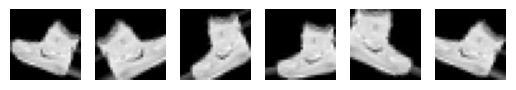

In [10]:
import cv2

def showAugmentation(augmentations=6):
  fig = plt.figure()
  for i in range(augmentations):
    a = fig.add_subplot(1, augmentations, i+1)
    img = next(aug_iter)[0].astype("uint8")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")

showAugmentation(6)

## Regularisation

In [67]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [68]:
print(f"Initial shape of dimensions of x_train: {x_train.shape}")

print(f"Number of samples in train data: {len(x_train)}")
print(f"Number of labels in train data: {len(y_train)}")

print(f"Number of samples in test data: {len(x_test)}")
print(f"Number of labels in test data: {len(y_test)}")

print("\n")
print(f"Dimensions of x_train: {x_train[0].shape}")
print(f"Labels in x_train: {y_train.shape}")
print("\n")
print(f"Dimensions of x_test: {x_test[0].shape}")
print(f"Labels in x_test: {y_test.shape}")

Initial shape of dimensions of x_train: (60000, 28, 28)
Number of samples in train data: 60000
Number of labels in train data: 60000
Number of samples in test data: 10000
Number of labels in test data: 10000


Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)


Dimensions of x_test: (28, 28)
Labels in x_test: (10000,)


<Figure size 640x480 with 0 Axes>

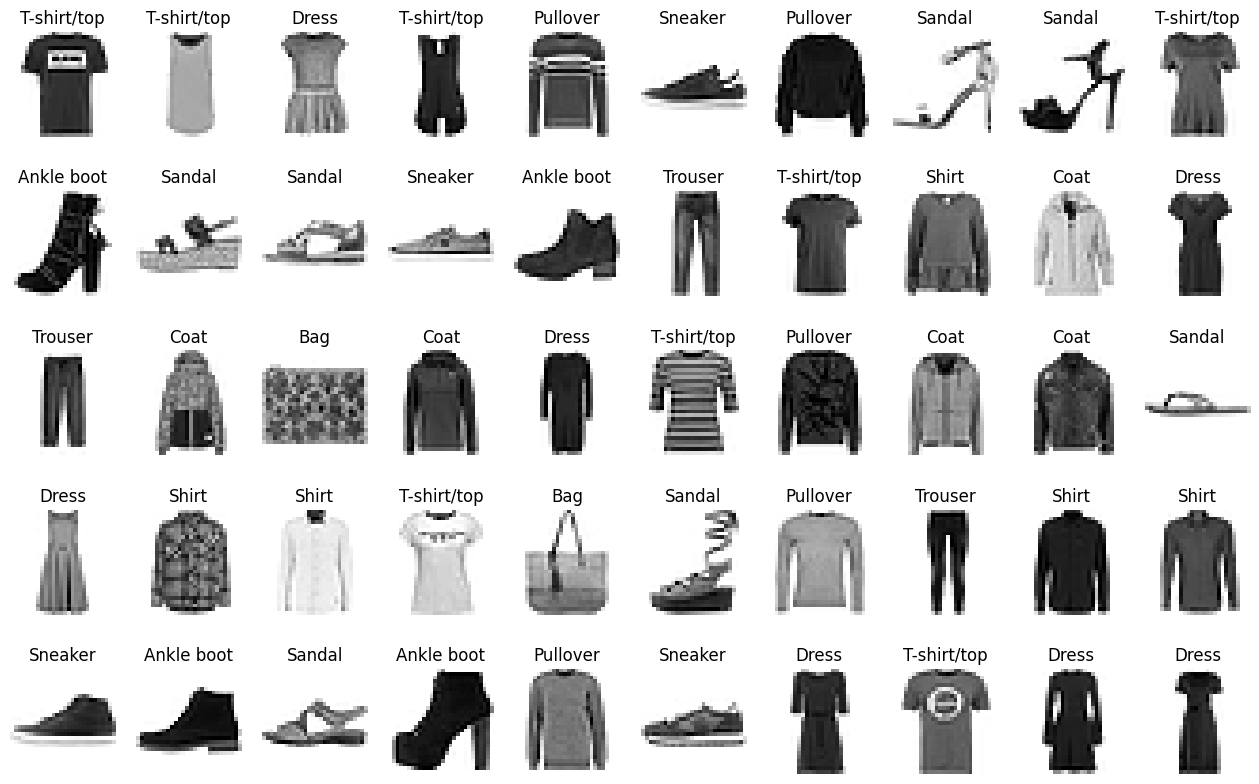

In [69]:
import matplotlib.pyplot as plt

figure = plt.figure()
plt.figure(figsize=(16,10))

num_of_images = 50

for index in range(1, num_of_images+1):
  class_names = classes[y_train[index]]
  plt.subplot(5, 10, index).set_title(f"{class_names}")
  plt.axis("off")
  plt.imshow(x_train[index], cmap="gray_r")

In [70]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [71]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

input_shape = (img_rows, img_cols, 1)

x_test /= 255.0

In [72]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Number of Classes: {y_test.shape[1]}")

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

Number of Classes: 10


In [73]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers

L2 = 0.001

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer = regularizers.l2(L2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(L2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer = regularizers.l2(L2)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.SGD(0.001, momentum=0.9),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_15 (Ba  (None, 26, 26, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_16 (Ba  (None, 24, 24, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                     

In [74]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

batch_size = 32
epochs = 15

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    steps_per_epoch=x_train.shape[0]//batch_size)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
1875/1875 [==============================] - 32s 17ms/step - loss: 1.0178 - accuracy: 0.7290 - val_loss: 0.7901 - val_accuracy: 0.8087
Epoch 2/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.8410 - accuracy: 0.7850 - val_loss: 0.6881 - val_accuracy: 0.8423
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7712 - accuracy: 0.8082 - val_loss: 0.6520 - val_accuracy: 0.8528
Epoch 4/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.7269 - accuracy: 0.8181 - val_loss: 0.6142 - val_accuracy: 0.8634
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6850 - accuracy: 0.8307 - val_loss: 0.5981 - val_accuracy: 0.8616
Epoch 6/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.6546 - accuracy: 0.8368 - val_loss: 0.5537 - val_accuracy: 0.8782
Epoch 7/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6301 - accuracy: 0.8413 - val_loss: 0.5487 -

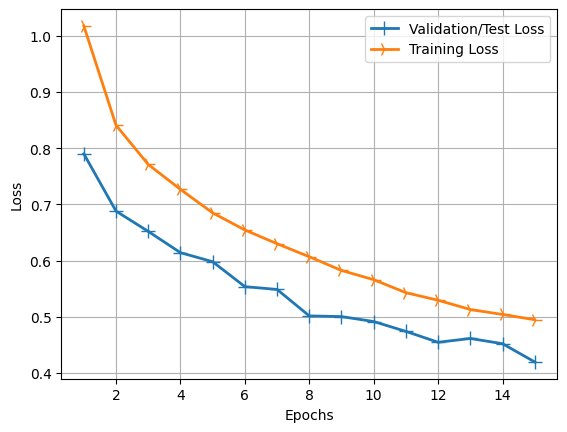

In [75]:
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

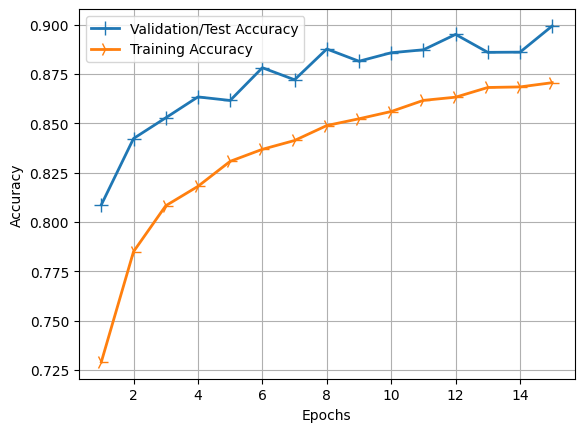

In [76]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()